<a href="https://colab.research.google.com/github/ffe4el/2022-2-Datascience/blob/main/%EC%8A%A4%EB%A7%88%ED%8A%B8%ED%8C%9C%EB%8D%B0%EC%9D%B4%ED%84%B0%EA%B3%BC%ED%95%99_10%EC%A3%BC%EC%B0%A8_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기상자료 활용하기

In [ ]:
import pandas as pd

## 기상자료 다운받기

In [ ]:
# API 이용하기
year_s = 2000
year_e = 2000
station_code = 146
url = f"https://api.taegon.kr/stations/{station_code}/?sy={year_s}&ey={year_e}&format=csv"

In [ ]:
# 데이터 프레임 만들기
df = pd.read_csv(url)

In [ ]:
# 연평균 기온

In [ ]:
# 총 강수량

In [ ]:
# 연간 최고기온

In [ ]:
# 연내 최저기온

In [ ]:
# 일교차

In [ ]:
# 적산온도
# http://www.newsam.co.kr/news/article.html?no=33537
# https://ko.wikipedia.org/wiki/%EC%A0%81%EC%82%B0%EC%98%A8%EB%8F%84

## 여러지역 기상자료 다루기

In [ ]:
# 지역별 기상자료 구하기
stations = {
    "경기도": 119,    # 수원
    # "강원도": 101,    # 춘천
    # "충청북도": 131,  # 청주
    # "충청남도": 129,  # 서산
    # "전라북도": 146,  # 전주
    # "전라남도": 156,  # 광주
    # "경상북도": 143,  # 대구
    # "경상남도": 155,  # 창원
    # "제주도": 184,    # 제주
}

In [ ]:
# 자료 다운로드 받기
year = 2000

df_all = None
weather_mean = {}
for station_name, station_code in stations.items():
  url = f"https://api.taegon.kr/stations/{station_code}/?sy={year}&ey={year}&format=csv"
  df = pd.read_csv(url)
  # 컬럼명 확인하고, 공백없애기
  # df.columns = [? for c in df]
  
  df["station_name"] = station_name
  df["station_code"] = station_code
  # TODO: 각 지역별로 읽은 데이터프레임을 하나로 합치기

  # 연도별 평균 저장하기
  # weather_mean = ??


In [ ]:
# 합쳐진 데이터 프레임에서 각 지역별 값이 정상적으로 출력되는지 확인
for station_name, station_code in stations.items():
  pass
  # df_all 데이터프레임에서 원하는 값 찾아서 출력하기


## 사과재배적지
http://weather.rda.go.kr/w/appMap/ftrAppleHelp.do?kind=


연평균기온

* 적지: 7.5 <= X < 11.5
* 가능지: 6.5 ~ 7.5, 11.5 ~ 12.5
* 부적지 & 저위생산지: X < 6.5, 12.5 < X

## 지도파일 다운받기

https://neurowhai.tistory.com/350

In [ ]:
!pip install leafmap


In [ ]:
import ipyleaflet
import json
from ipyleaflet import Map, GeoJSON

In [ ]:
weather_mean

In [ ]:
with open('TL_SCCO_CTPRVN.json', 'r') as f:
    data = json.load(f)

def random_color(feature):
    if feature['properties']["CTP_KOR_NM"] in weather_mean:
      tavg = weather_mean[feature['properties']["CTP_KOR_NM"]]
      if 7.5 <= tavg < 11.5:
        return  {
          'color': 'black',
          'fillColor': 'green',
        }
      elif 6.5 <= tavg < 7:
        return  {
          'color': 'black',
          'fillColor': 'orange',
        }
      elif 11.5 <= tavg < 12.5:
        return  {
          'color': 'black',
          'fillColor': 'orange',
        }
        
    return {
        'color': 'black',
        'fillColor': 'red',
    }

m = Map(center=(36, 127.5), zoom=6)

geo_json = GeoJSON(
    data=data,
    style={
        'opacity': 1, 'dashArray': '9', 'fillOpacity': 0.3, 'weight': 1
    },
    hover_style={
        'color': 'white', 'dashArray': '0', 'fillOpacity': 0.5
    },
    style_callback=random_color
)
m.add_layer(geo_json)
m

# 전라북도 시군구 지도만들기 (과제)

* 고령화[aging, population aging]: 평균수명의 증가에 따라 총인구 중에 차지하는 고령자(노인)의 인구비율이 점차로 많아지는 현상 또는 높은 상태.
  * 고령화사회(ageing society):총인구 중 65세 이상 인구가 차지하는 비율이 7% 이상
  *고령사회(aged society):총인구 중 65세 이상 인구가 차지하는 비율이 14% 이상
  *초고령사회 혹은 후기고령사회(post-aged society): 총인구 중 65세 이상 인구가 차지하는 비율이 20% 이상

7주차 강의자료를 참고하여, 지도를 완성하시오.
https://colab.research.google.com/drive/1PJP2vYh3ifSTD-utb0Hp4uIlLtczNeXI#scrollTo=VMqgL-hk9mU_


In [ ]:
# 데이터 다운로드 받기
# https://jumin.mois.go.kr/index.jsp#
# 아래 화면과 같이 설정하고, "csv 파일 다운로드" 버튼으로 자료 구득

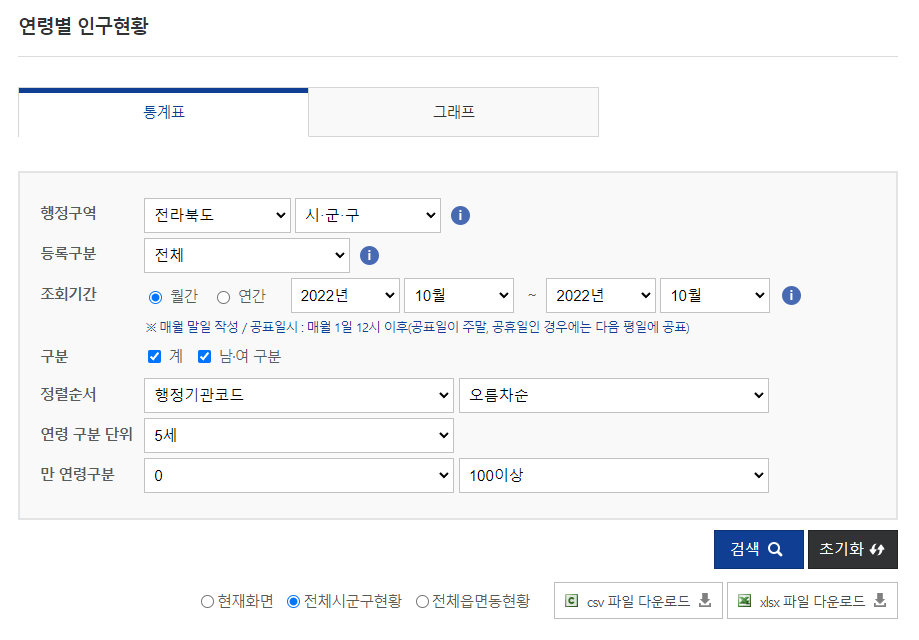

In [ ]:
# 데이터 불러오기

In [ ]:
# 65세 이상 인구 비율 구하기

In [ ]:
# 비율에 따라 지도 그리기

## 읍면동 자료 받기

 - 위 그림에서 "전체읍면동현황" 선택 후, 데이터 분석

In [ ]:
# 읍면동별 자료 받기

In [ ]:
# 65세 이상 인구비율 구하기

In [ ]:
# 전라북도에서 초고령사회로 진입한 읍면동 구하기

In [ ]:
# 전라북도 읍면동 중, 고령화사회, 고령사회, 초고령사회에 해당하는 읍면동의 총 갯수를 구하기

In [ ]:
# 65세 이상 인구비율이 가장 낮은 지역 5개와 가장 높은 지역 5개를 출력하기